# Защита персональных данных клиентов

Необходимо защитить данные клиентов страховой компании «Хоть потоп».
Цель проекта - разработка такого метода преобразования данных, чтобы по ним было сложно восстановить персональную информацию.

Данные нужно защитить таким образом, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

Описание данных:

Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.

Целевой признак: количество страховых выплат клиенту за последние 5 лет.

Шаги при выполнении проекта:

Загрузите и изучите данные.

Ответьте на вопрос и обоснуйте решение.
 Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?
 a. Изменится. Приведите примеры матриц.
 b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

Предложите алгоритм преобразования данных для решения задачи. Обоснуйте, почему качество линейной регрессии не поменяется.

Запрограммируйте этот алгоритм, применив матричные операции. Проверьте, что качество линейной регрессии из sklearn не отличается до и после преобразования. Примените метрику R2.

## Загрузка данных

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('/datasets/insurance.csv')

In [ ]:
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [ ]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [ ]:
df['Страховые выплаты'].unique()

array([0, 1, 2, 3, 5, 4])

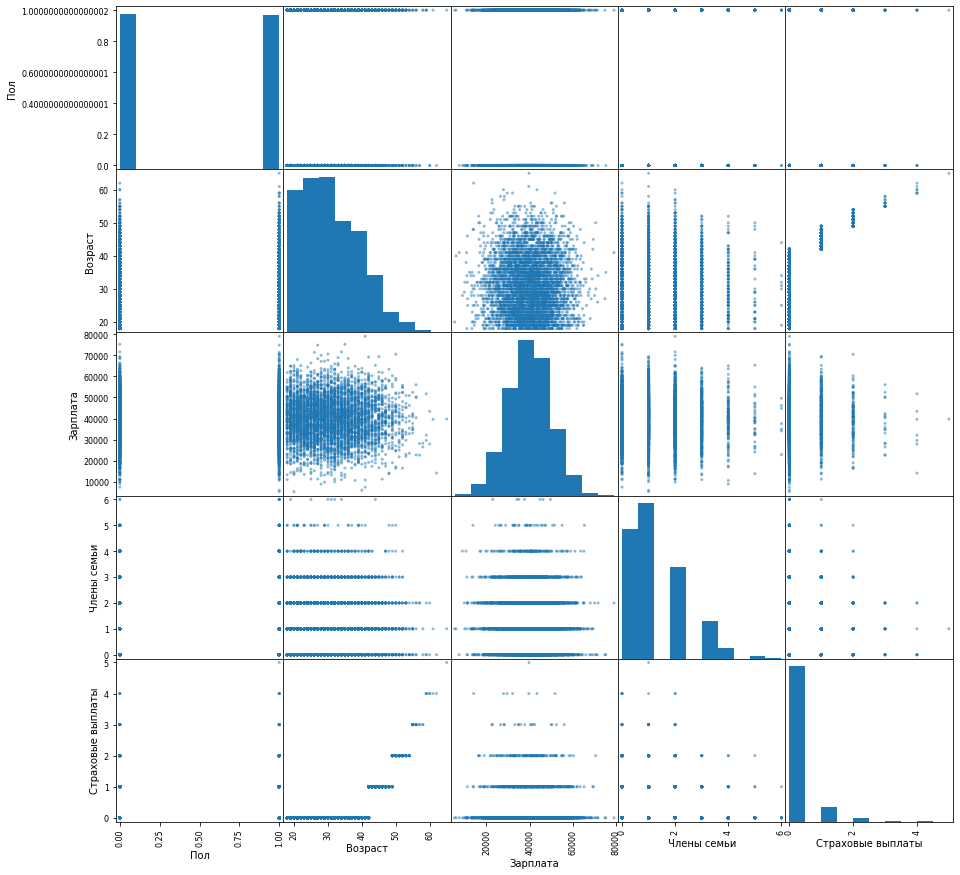

In [ ]:
pd.plotting.scatter_matrix(df, figsize=(15, 15));

In [ ]:
df.corr()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.000000,0.002074,0.014910,-0.008991,0.010140
Возраст,0.002074,1.000000,-0.019093,-0.006692,0.651030
Зарплата,0.014910,-0.019093,1.000000,-0.030296,-0.014963
Члены семьи,-0.008991,-0.006692,-0.030296,1.000000,-0.036290
Страховые выплаты,0.010140,0.651030,-0.014963,-0.036290,1.000000


Таблица с данными содержит 5 столбцов и 5000 строк. Пропуски в данных отсутствуют. Присутствует довольно высокая корреляция между страховыми выплатами и возрастом.

## Умножение матриц

In [ ]:
features = df.drop('Страховые выплаты', axis=1)
target = df['Страховые выплаты']

Обучаем модель на имеющихся данных

In [ ]:
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
print('R2:' , r2_score(target, predictions))

R2: 0.4249455028666801


Создаем модель, которая будет обучаться на признаках умноженных на обратимую матрицу

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

- $E$ — единичная матрица

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

In [ ]:
class LinearRegression_new:
    def fit(self, train_features, train_target):
        self.P = np.random.normal(size=(4, 4))
        invert = np.linalg.inv(self.P)
        features_new = train_features.dot(self.P)
        X = np.concatenate((np.ones((features_new.shape[0], 1)), features_new), axis=1)
        y = train_target
        w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]
    def predict(self, test_features):
        return test_features.dot(self.P).dot(self.w) + self.w0
model = LinearRegression_new()
model.fit(features, target)
predictions = model.predict(features)
print('R2:' , r2_score(target, predictions))

R2: 0.4249455028666844


Показатели метрики R2 у модели, обученной на признаках умноженных на обратимую матрицу, практически полностью совпадают с R2 модели, обученных на не измененных признаках.

**Ответ:** качество линейной регрессии при умножении признаков на обратимую матрицу не изменится.

**Обоснование:**

докажем, что предсказания у двух моделей совпадают:

расчитаем вектор весов ($w_p$) преобразованной линейной регрессии
$$
w_p = ((XP)^T XP)^{-1} (XP)^T y = (P^T X^TX P)^{-1} P^T X^T y = ((P^T X^TX) P)^{-1} P^T X^T y = P^{-1}(P^T X^TX)^{-1}P^T X^T y = P^{-1}(X^T X)^{-1}(P^T)^{-1}P^T X^T y = P^{-1}(X^T X)^{-1}EX^T y = P^{-1}(X^T X)^{-1}X^T y = P^{-1} w
$$
получили связь параметров линейной регрессии в исходной и преобразованной линейной регресии. Вектор весов линейной регрессии, преобразованой путем умножения признаков на обратимую матрицу $P$ равен вектору весов исходной линейной регресии умноженному на обратную матрицу $P^{-1}$ матрицы $P$
$$
w_p = P^{-1} w
$$

найдем предсказание $a_p$ преобразованной линейной регрессии:
$$
a_p = X P P^{-1} w = X w = a
$$
получили $a$ = $a_p$

## Алгоритм преобразования

**Алгоритм**
1. Создаем матрицу первой строкой в которой будут средние значения признаков, во второй - медианные, в третьей - минимальные, в четвертой - максимальные.
2. Проверяем созданную матрицу на обратимость.
3. В случае, если матрица не обратимая генерируем новую случайную матрицу 4х4, и снова проверяем. Действия повторяются пока не будет найдена обратимая матрица.
3. Умножаем признаки на полученную обратимую транспонированную матрицу.


**Обоснование**

Как было рассмотрено выше, при умножении признаков на обратимую матрицу качество модели не меняется, а после такого преобразования данных восстановить персональную информацию затруднительно.

## Проверка алгоритма

1. Создаем матрицу

In [ ]:
features_mean = np.array([features.mean().values, features.median().values,
                          features.min().values, features.max().values])
features_mean

array([[4.990000e-01, 3.095280e+01, 3.991636e+04, 1.194200e+00],
       [0.000000e+00, 3.000000e+01, 4.020000e+04, 1.000000e+00],
       [0.000000e+00, 1.800000e+01, 5.300000e+03, 0.000000e+00],
       [1.000000e+00, 6.500000e+01, 7.900000e+04, 6.000000e+00]])

In [ ]:
det = np.linalg.det(features_mean)
det

-1032939.2200000009

In [ ]:
def func(features):
    features_mean = np.array([features.mean().values, features.median().values,
                          features.min().values, features.max().values])
    det = np.linalg.det(features_mean)
    while det == 0:
        features_mean = np.random.normal(size=(4, 4))
        det = np.linalg.det(features_mean)
    return features_mean

In [ ]:
features_mean = func(features)
features_mean

array([[4.990000e-01, 3.095280e+01, 3.991636e+04, 1.194200e+00],
       [0.000000e+00, 3.000000e+01, 4.020000e+04, 1.000000e+00],
       [0.000000e+00, 1.800000e+01, 5.300000e+03, 0.000000e+00],
       [1.000000e+00, 6.500000e+01, 7.900000e+04, 6.000000e+00]])

2. Умножаем признаки на транспонированную матрицу

In [ ]:
features_new = features@features_mean.T
features_new.head()

,0,1,2,3
0,1.979853e+09,1.993921e+09,262880738.0,3.918403e+09
1,1.516823e+09,1.527601e+09,201400828.0,3.002003e+09
2,8.382445e+08,8.442009e+08,111300522.0,1.659002e+09
3,1.664513e+09,1.676341e+09,221010378.0,3.294301e+09
4,1.041818e+09,1.049221e+09,138330504.0,2.061902e+09


Проверяем качество модели

In [ ]:
features_train, features_test, target_train, target_test = train_test_split(features, target,
                                                                            test_size=0.3, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(features_train, target_train)
predictions = model.predict(features_test)
print('R2:' , r2_score(target_test, predictions))

R2: 0.422699969446072


In [ ]:
features_train_new, features_test_new, target_train_new, target_test_new = train_test_split(features_new, target,
                                                                                            test_size=0.3, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(features_train_new, target_train_new)
predictions = model.predict(features_test_new)
print('R2:' , r2_score(target_test_new, predictions))

R2: 0.42269996732399273


После преобразования данных качество модели не изменилось.

В проекте были использованы данные клиентов страховой компании. Было доказано, что качество линейной регрессии не изменится при умножении признаков на обратимую матрицу. Для защиты данных предложен алгоритм: создается матрица первой строкой в которой будут средние значения признаков, во второй - медианные, в третьей - минимальные, в четвертой - максимальные, признаки умножаются на данную траспонированную матрицу. Проверка данного алгоритма показала, что качество линейной регрессии не отличается до и после преобразования данных. Предложенный алгоритм можно использовать для преобразования данных, чтобы по ним было сложно восстановить персональную информацию клиентов.